## Erwin Antepuesto 

### Spectral Theory Application

#### Assignment 1

Read about spectral clustering module in Python's Scikit Learn Package.

1. Choose a dataset from https://datasetsearch.research.google.com/.

2. Perform spectral clustering from your chosen dataset, derive conclusions from the result.

NOTE: You should have a different dataset from your classmates, otherwise both of you will recieve a failing grade.

##### Chosen Data: Philippines Dengue Cases 2016-2020
https://datasetsearch.research.google.com/search?src=0&query=wine&docid=L2cvMTFrcXZsejYweg%3D%3D
##### Context
Data set contains the recorded number of dengue cases per region of the Philippines from year 2016 to 2020. It can be used to find trends about the disease as well as spatiotemporal analysis that can result into data-driven solution about the trends of the desease for the past 5 years.
##### Metadata
Month - Month of the year in text format.
Year - Ranges from 2016-2020 in numerical format.
Region - Region in the Philippines.
Dengue_Cases - Number of Monthly Cases per region. The dengue deaths is also included in this feature.
Dengue_Deaths - Number of Monthly Deaths per region due to dengue.

Silhouette Score: 0.8578603738573917

Cluster Statistics:
         Dengue_Cases  Dengue_Deaths
Cluster                             
0         1126.841584       8.094059
1         1083.750000    1312.000000
2          830.000000     570.166667

Number of Data Points in Each Cluster:
0    1010
1       4
2       6
Name: Cluster, dtype: int64


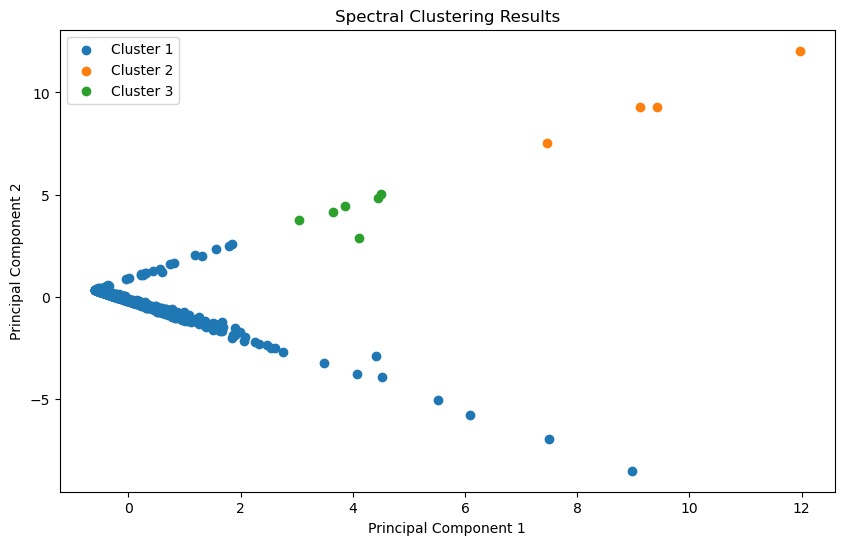

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'ph_dengue_cases2016-2020.csv'  # Replace with the actual path
df = pd.read_csv(file_path)

# Select features for clustering
features = ['Dengue_Cases', 'Dengue_Deaths']

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Perform spectral clustering
n_clusters = 3  # You can adjust this based on your requirements
spectral = SpectralClustering(n_clusters=n_clusters, random_state=42)
df['Cluster'] = spectral.fit_predict(df_scaled)

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Display cluster statistics
cluster_stats = df.groupby('Cluster')[features].mean()  # You can use 'median' instead of 'mean' if preferred
print('\nCluster Statistics:')
print(cluster_stats)

# Display the number of data points in each cluster
cluster_sizes = df['Cluster'].value_counts().sort_index()
print('\nNumber of Data Points in Each Cluster:')
print(cluster_sizes)

# Visualize the clusters (using PCA for 2D visualization)
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Scatter plot
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster + 1}')

plt.title('Spectral Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


#### Conclusion
##### Silhouette Score:

The high silhouette score (0.86) indicates well-defined and separated clusters, suggesting that the spectral clustering algorithm has successfully identified distinct patterns in the data.
##### Cluster Statistics:

Cluster 0: This cluster has a relatively moderate number of dengue cases (mean of 1126) and a lower number of deaths (mean of 8). It represents regions with a moderate prevalence of dengue.

Cluster 1: This cluster has a high number of dengue cases (mean of 1083) and a significantly higher number of deaths (mean of 1312). It represents regions with a high incidence of dengue and a higher mortality rate.

Cluster 2: This cluster has a lower number of dengue cases (mean of 830) and a moderate number of deaths (mean of 570). It represents regions with a lower prevalence of dengue compared to Cluster 0 and a moderate mortality rate.
##### Number of Data Points in Each Cluster:

Cluster 0 has a substantial number of data points (1010), indicating that a significant portion of the dataset falls into this cluster.
Clusters 1 and 2 have a much smaller number of data points (4 and 6, respectively).
##### Graph Visualization:
The graph shows a distinct pattern with three clusters, forming a "<" shape.
Cluster 0 occupies the lower and middle part of the "<" shape, indicating regions with moderate dengue prevalence and lower mortality.
Cluster 1 is positioned at the middle and top part of the "<", representing regions with high dengue prevalence and a higher mortality rate.
Cluster 2 is in between, suggesting regions with lower dengue prevalence compared to Cluster 0 and a moderate mortality rate.
##### Final Conclusion:

The dataset appears to exhibit clear spatial patterns related to dengue incidence and mortality in the Philippines.
Cluster 1 stands out as having both high dengue cases and deaths, suggesting regions that might require special attention and targeted interventions.
Clusters 0 and 2 represent regions with different levels of dengue prevalence and mortality rates, providing valuable information for public health planning and resource allocation.

#### Assignment 2

Given the following graph below, find it eigenvector centrality:

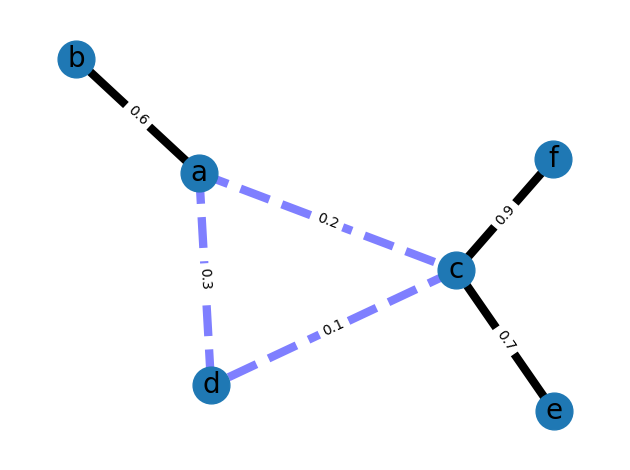

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

Eigenvector Centrality:
a: 0.51807347662071
b: 0.21182192277183212
c: 0.5986761070959697
d: 0.4566010978754134
e: 0.24477918831750853
f: 0.24477918831750853


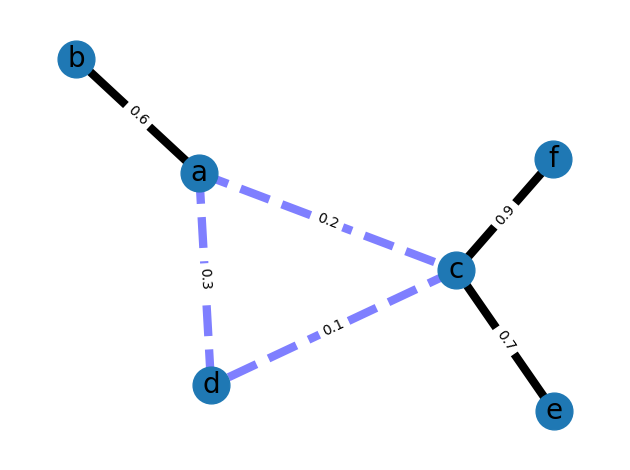

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

print("Eigenvector Centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"{node}: {centrality}")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

#### Assignment 2

Read about the application of network science

1. https://medium.com/social-media-theories-ethics-and-analytics/network-analysis-from-social-media-data-with-networkx-13605d711590

2. http://snap.stanford.edu/class/cs224w-2011/proj/tbower_Finalwriteup_v1.pdf

3. Based on the readings provided; think about an interesting topic that you can find in Reddit (Not COVID-19, its already given in the reading material think of something else).

4. On the topic of your choosing develop a hypothesis and conduct a social network analysis. Find the eigenvector centrality. Which of the nodes are central in terms of eigenvectors? Develop a conclusion from your hypothesis.

In [11]:
pip install praw

  Obtaining dependency information for praw from https://files.pythonhosted.org/packages/81/6a/21bc058bcccbe03f6a0895bf1bd60c805f0c526aa4e9bfaac775ed0b299c/praw-7.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for prawcore<3,>=2.1 from https://files.pythonhosted.org/packages/96/5c/8af904314e42d5401afcfaff69940dc448e974f80f7aa39b241a4fbf0cf1/prawcore-2.4.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   -------- ------------------------------ 41.0/191.0 kB 991.0 kB/s eta 0:00:01
   ------------------- -------------------- 92.2/191.0 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 143.4/191.0 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Subreddit: destiny
Title: Official Destiny Subreddit
Centrality Nodes based on corresponding Eigenvectors: [Redditor(name='jezzyjaz'), Redditor(name='Academic-Tone-3093'), Redditor(name='mrthenarwhal'), Redditor(name='Financial_Machine848'), Redditor(name='mguyer2018aa')]


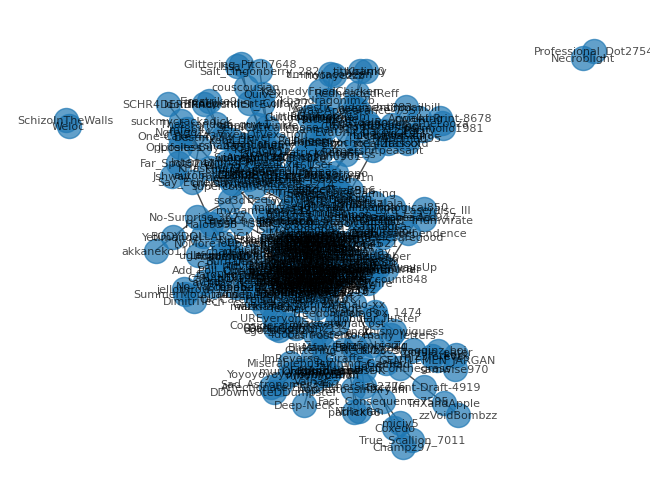

In [12]:
import praw
import networkx as nx
import matplotlib.pyplot as plt

# Create a Reddit instance
reddit = praw.Reddit(
    client_id = "u01nV9XriM4AM36RNQ25DA",
    client_secret = "5sVtNjbuCKG3_Ljl81gDYiiO4EwX1w",
    user_agent = "Big_Feed3369",
)

def print_subreddit_info(subreddit):
    print(f"Subreddit: {subreddit.display_name}")
    print(f"Title: {subreddit.title}")

def get_top_post_id(subreddit):
    return subreddit.top(limit=1).__next__().id

def create_social_network(post_id):
    submission = reddit.submission(id=post_id)
    G = nx.Graph()

    for comment in submission.comments.list():
        # Skip MoreComments objects
        if isinstance(comment, praw.models.MoreComments):
            continue

        # Check if the comment and parent comment have valid authors
        if comment.author and comment.parent() and comment.parent().author:
            G.add_edge(comment.author, comment.parent().author)

    return G

def perform_social_network_analysis(social_network):
    eigenvector_centrality = nx.eigenvector_centrality(social_network)
    sorted_nodes = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)
    top_nodes = sorted_nodes[:5]
    print("Centrality Nodes based on corresponding Eigenvectors:", top_nodes)

def visualize_network(social_network):
    pos = nx.spring_layout(social_network)  # Set layout algorithm
    nx.draw(social_network, pos, with_labels=True, font_size=8, font_color="black", alpha=0.7)
    plt.show()

# Choose a subreddit
subreddit_name = "wallstreetbets"
subreddit = reddit.subreddit(subreddit_name)

# Print subreddit information
print_subreddit_info(subreddit)

# Get the top post from the subreddit
post_id = get_top_post_id(subreddit)

# Create social network graph from comments
social_network = create_social_network(post_id)

# Perform social network analysis
perform_social_network_analysis(social_network)

# Visualize the network
visualize_network(social_network)